# 3.1 연결리스트(Linked List)란?

연결 리스트는 대부분의 알고리즘에서 사용하는 기본 자료구조

알고리즘에서 사용하는 데이터와 다음 노드를 가르키는 링크를 묶어서 노드로 정의하여 사용

C나 C++과 같은 프로그래밍 언어에서는 포인터(pointer)의 개념으로 링크를 사용

파이썬은 포인터라는 개념이 없음(필요하지 않음)


## 3.1.1 노드(Node)와 링크(Link)

파이썬에서 연결 리스트를 사용하기 위해서는 노드(Node)를 다음과 같이 클래스로 정의하여 사용

In [1]:
# Node

class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

위의 코드는 Node라는 이름의 클래스를 선언

이 클래스로 객체가 생성될때 __init__ 메서드를 호출

이 Node 클래스는 데이터를 저장하는 data와 링크를 저장하는 next를 멤버로 갖고 있음

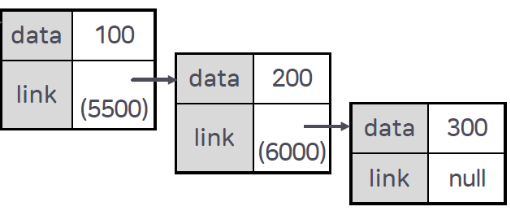

위 그림을 자세히 보면 링크에 화살표로 되어 있는 방향이 있음을 알 수 있음

다음 노드를 가르키는 링크만이 존재하는 노드

자신의 노드에서 다음의 노드만을 가리킬 수 있는 형태가 전형적인 연결 리스트의 형태


## 3.1.2 연결 리스트의 특징

연결 리스트는 자료를 저장하는 하나의 자료구조에 불과

기본적인 개념은 파이썬의 배열과 거의 동일

### 왜 배열을 사용하지 않고 연결 리스트를 사용할까? 

연결 리스트의 장점은 곧 배열의 단점이 됨

배열 
- 동일한 자료형을 갖는 데이터의 집합
- 연속적이라는 것이 특징
- 한번에 총 메모리를 확보하여 사용 
- 프로그램이 실행되는 중간에 배열의 크기를 바꾸거나 할수 없음

배열의 단점
- 배열 안에 저장되어 있는 값들을 정렬할 때도 일일이 메모리에 저장되어 있는 값을 바꿔야 함
- 연결리스트는 이와 같은 배열의 단점을 해결

배열은 연속된 메모리를 사용하지만 연결리스트는 반드시 연속적이라고 볼 수 없음 

연결 리스트는 연속적이지 않는 데이터들을 링크로 서로 연결하는 개념

---

# 3.2 연결 리스트의 삽입과 삭제 알고리즘

연결 리스트에 새로운 노드를 삽입하는 방법

## 3.2.1 연결리스트의 초기화

- 2개 이상의 데이터를 노드에 저장하여 서로 연결하게 되는 연결 리스트의 초기화
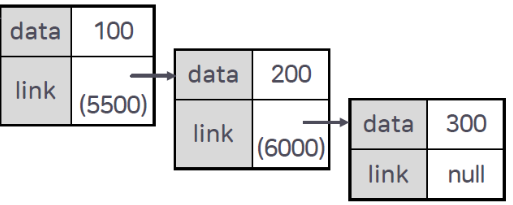

#### 총 4개의 노드가 연결된 연결리스트를 만들기

In [4]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next
        
        
def init_list():
    global node_A
    node_A = Node("A")
    node_B = Node("B")
    node_C = Node("C")    
    node_D = Node("D")
    node_A.next = node_B
    node_B.next = node_C
    node_C.next = node_D
    
    
def print_list():
    global node_A
    node = node_A
    while node:
        print(node.data)
        node = node.next

    
    
if __name__ == "__main__":
    init_list()
    print_list()
    

A
B
C
D


## 3.2.1 연결 리스트의 삽입 알고리즘

배열과 달리 연결 리스트는 각각의 노드가 링크로 연결되어 있다.
 
연결 리스트의 중간에 어떤 값을 노드로 연결시키는 것도 간단하다.


---
노드A -> 노드B -> 노드D -> 노드E

노드B와 노드D 사이에 노드C 삽입하기

노드A -> 노드B -> 노드C -> 노드D -> 노드E

---


A,B,D,E 총 4개의 노드가 있다고 가정

노드B와 노드D사이에 노드C를 삽입하기 위해서는 

1. 새로 삽입되는 노드C가 노드D를 가리키도록하고,

2. 그 후에 원래 노드 D를 가리키고 있던 노드 B가 노드 C를 가리키도록 해야한다.

- 링크의 순서를 바꾸면 절대 안됨
- 바꾸게 될 경우 연결 리스트의 전체 연결이 끊어져 버림

In [7]:
# 노드 클래스 선언
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

# 노드 초기화
def init_list():
    # 생성할 노드_A를 전역으로 설정
    # 노드A -> 노드B -> 노드D -> 노드E 구성 
    global node_A
    node_A = Node("A")
    node_B = Node("B")
    node_D = Node("D")
    node_E = Node("E")
    node_A.next = node_B
    node_B.next = node_D
    node_D.next = node_E
    
# 노드 삭제 기능    
def delete_node(del_data):
    # 전역 노드A사용
    global node_A
    # 앞노드변수가  노드 A를 가르킴(포인터개념)
    pre_node = node_A
    # 다음 노드를 앞노드의 다음노드로 가르킴
    next_node =pre_node.next
    
    # 만약 앞노드에 데이터가 삭제할 데이터와 같다면
    if pre_node.data == del_data:
        # 노드 A에 다음 노드를 넣음 
        node_A = next_node
        # 앞 노드를 삭제
        del pre_node
        return
    
    # 다음노드가 있다면 반복
    while next_node:
        # 다음노드의 데이터가 삭제할 데이터라면?
        if next_node.data == del_data:
            # 앞노드의 다음노드를 다음 노드의 다음으로 바꿈 
            # A->B->C가 있을때 A가 C를 가르키게 함
            pre_node.next = next_node.next
            # 그리고 B를 삭제
            del next_node
            break
        # 앞노드를 다음 노드로 변경
        pre_node = next_node
        # 다음 노드를 다다음 노드로 변경
        next_node = next_node.next
        
# 노드 추가        
def insert_node(data):
    # 전역 노드 A 사용
    global node_A
    # 새로운 노드 생성
    new_node = Node(data)
    # 새 변수 P와 T에 노드A를 가르키게 함
    node_P = node_A
    node_T = node_A
    # 가르키는 변수T 데이터가 삽입되는 데이터보다 작거나 같다면 반복 
    while node_T.data <= data:
        # 순회 시킴
        node_P = node_T
        node_T = node_T.next
    # 새로운 노드의 포인터를 A -> B  |여기에 들어갈것| -> D
    # C노드가 D 노드를 가르키게 함 
    new_node.next = node_T
    # B노드가 C노드를 가르키게 함
    node_P.next = new_node
    
    
def print_list():
    global node_A
    node = node_A
    while node:
        print(node.data)
        node = node.next
        
        
if __name__ == "__main__":
    print("연결리스트 초기화 후")
    init_list()
    print_list()
    print("노드 C를 추가한 후")
    insert_node("C")
    print_list()

연결리스트 초기화 후
A
B
D
E
노드 C를 추가한 후
A
B
C
D
E


## 3.2.2 삽입 알고리즘의 분석

### 1. 시간의 효율성

- 배열을 사용하던 연결 리스트를 사용하던 
  데이터나 노드를 삽입하기 위해서는 
  삽입할 데이터의 위치 검색 과정과 실제 데이터를 삽입하는 과정이 필요
  
  
- 연결 리스트는 배열에 비해 시간의 효율성이 훨씬 높음

- 삽입할 데이터의 위치 검색 과정에서는 배열과 그다지 차이가 없지만

- 실제 데이터를 삽입하는 과정은 
  전체 배열의 크기와 연결 리스트의 노드의 수가 많으면 많을 수록 현격한 차이를 보여준다.
  

### 2. 공간의 효율성
- 배열은 실제 프로그래밍에서 사용할 때 프로그램의 실행 중에 배열의 크기를 변경시키지 못하기 때문에 공간의 효율성이 떨어진다. 하지만 연결 리스트는 언제든지 필요할 때 동적으로 공간(메모리)을 할당하여 사용할 수 있으므로 배열에 비해 공간의 효율성이 뛰어나다고 할 수 있다.


### 3. 코드의 효율성
- 코드의 효율성은 연결 리스트보다 배열이 조금 더 낫다고 볼 수도 있다. 배열의 경우 for문에서 사용하는 것처럼 배열의 인덱스만으로도 가능하기 떄문에 코드를 작성할 때도 간단하고, 코드를 이해하기는 훨씬 수월하다. 그에 비해서 연결 리스트의 코드는 포인터와 구조체로 되어 있기 때문에 처음 접하는 독자들은 이해하기 쉽지 않다.



## 3.2.3 연결 리스트의 삭제 알고리즘

In [9]:
# 노드 클래스 선언
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

# 노드 초기화
def init_list():
    # 생성할 노드_A를 전역으로 설정
    # 노드A -> 노드B -> 노드D -> 노드E 구성 
    global node_A
    node_A = Node("A")
    node_B = Node("B")
    node_D = Node("D")
    node_E = Node("E")
    node_A.next = node_B
    node_B.next = node_D
    node_D.next = node_E
    
# 노드 삭제 기능    
def delete_node(del_data):
    # 전역 노드A사용
    global node_A
    # 앞노드변수가  노드 A를 가르킴(포인터개념)
    pre_node = node_A
    # 다음 노드를 앞노드의 다음노드로 가르킴
    next_node =pre_node.next
    
    # 만약 앞노드에 데이터가 삭제할 데이터와 같다면
    if pre_node.data == del_data:
        # 노드 A에 다음 노드를 넣음 
        node_A = next_node
        # 앞 노드를 삭제
        del pre_node
        return
    
    # 다음노드가 있다면 반복
    while next_node:
        # 다음노드의 데이터가 삭제할 데이터라면?
        if next_node.data == del_data:
            # 앞노드의 다음노드를 다음 노드의 다음으로 바꿈 
            # A->B->C가 있을때 A가 C를 가르키게 함
            pre_node.next = next_node.next
            # 그리고 B를 삭제
            del next_node
            break
        # 앞노드를 다음 노드로 변경
        pre_node = next_node
        # 다음 노드를 다다음 노드로 변경
        next_node = next_node.next
        
# 노드 추가        
def insert_node(data):
    # 전역 노드 A 사용
    global node_A
    # 새로운 노드 생성
    new_node = Node(data)
    # 새 변수 P와 T에 노드A를 가르키게 함
    node_P = node_A
    node_T = node_A
    # 가르키는 변수T 데이터가 삽입되는 데이터보다 작거나 같다면 반복 
    while node_T.data <= data:
        # 순회 시킴
        node_P = node_T
        node_T = node_T.next
    # 새로운 노드의 포인터를 A -> B  |여기에 들어갈것| -> D
    # C노드가 D 노드를 가르키게 함 
    new_node.next = node_T
    # B노드가 C노드를 가르키게 함
    node_P.next = new_node
    
    
def print_list():
    global node_A
    node = node_A
    while node:
        print(node.data)
        node = node.next
        
        
if __name__ == "__main__":
    print("연결리스트 초기화 후")
    init_list()
    print_list()
    print("노드 C를 추가한 후")
    insert_node("C")
    print_list()
    print("노드 D를 삭제한 후")
    delete_node("D")
    print_list()

연결리스트 초기화 후
A
B
D
E
노드 C를 추가한 후
A
B
C
D
E
노드 D를 삭제한 후
A
B
C
E


### 3.2.4 삭제 알고리즘의 분석

#### 1. 시간의 효율성

연결 리스트를 삽입 알고리즘과 마찬가지로 삭제 알고리즘도 삭제할 노드를 검색하는 과정과 찾은 노드를 삭제하는 과정이 필요하다.

노드를 삭제하는 경우에 배열은 삽입 알고리즘과 마찬가지로 삭제한 후 삭제한 데이터 이후의 데이터들을 모두 앞으로 한 칸씩 이동해야 하는 반면에 연결 리스트는 링크를 끊어주고 삭제할 노드만을 헤제해주면 된다.

따라서 시간적인 효율성은 배열보다 훨씬 좋다고 볼수 있다.


#### 2. 공간의 효율성
배열에 비해 연결 리스트는 삽입 알고리즘과 마찬가지로 메모리에 할당하고, 또 삭제한 메모리를 해제하기 때문에 공간적인 효율성이 높다고 볼수 있다.


#### 3. 코드의 효율성
코드의 효율성은 연결 리스트보다 배열이 좀더 낫다고 볼 수도 있다.
삽입 알고리즘과 마찬가지로 배열의 경우에는 인덱스로 처리하기 떄문에 개념적으로 이해하기는 연결 리스트보다 배열이 더 쉬울수 있다.